### Importing Libraries and Packages

In [6]:
# importing libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from textblob import TextBlob
import spacy
nlp=spacy.load('en_core_web_sm')

### Loading the dataset

In [7]:
df=pd.read_csv('NLPFullbook.csv',encoding='cp1252')

In [8]:
df

,chapter no,title,content
0,1,What kind of person can command with only his ...,The most notorious of Jordan’s prisons is the ...
1,2,Here was a real leader”,Two weeks before King Hussein’s death—in the c...
2,3,A problem like that always comes back”,"Six months after regaining his freedom, Abu Mu..."
3,4,The time for training is over”,"On November 30, 1999, Jordanian investigators ..."
4,5,I did it for al-Qaeda and for Zarqawi”,"Laurence Foley was never a flashy man, but the..."
5,6,This war is going to happen”,The man who would become the CIA’s chief spy i...
6,7,No longer a victory,"The Iraqi officer was crying, again. He sat at..."
7,8,So you guys think this is an insurgency?,A few days after the bombing of the UN buildin...
8,9,Revolting is exactly what we want,"In January 2004, some ten months after his arr..."
9,10,It would surpass anything al-Qaeda did,"On February 29, 2004, Dallah al-Khalayleh, the..."


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   chapter no   21 non-null     int64 
 1   title        21 non-null     object
 2   content      21 non-null     object
dtypes: int64(1), object(2)
memory usage: 632.0+ bytes


In [360]:
df.describe()

,chapter no
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


## Renaming the last column

In [361]:
print(df.columns)

Index(['chapter no ', 'title', 'content'], dtype='object')


In [362]:
df = df.rename(columns={'Text': 'Content'})
df.head(5)

,chapter no,title,content
0,1,What kind of person can command with only his ...,The most notorious of Jordan’s prisons is the ...
1,2,Here was a real leader”,Two weeks before King Hussein’s death—in the c...
2,3,A problem like that always comes back”,"Six months after regaining his freedom, Abu Mu..."
3,4,The time for training is over”,"On November 30, 1999, Jordanian investigators ..."
4,5,I did it for al-Qaeda and for Zarqawi”,"Laurence Foley was never a flashy man, but the..."


## Tokenization

In [363]:
import nltk

#nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['content_token']=df['content'].apply(regexp.tokenize)
df

,chapter no,title,content,content_token
0,1,What kind of person can command with only his ...,The most notorious of Jordan’s prisons is the ...,"[The, most, notorious, of, Jordan, s, prisons,..."
1,2,Here was a real leader”,Two weeks before King Hussein’s death—in the c...,"[Two, weeks, before, King, Hussein, s, death, ..."
2,3,A problem like that always comes back”,"Six months after regaining his freedom, Abu Mu...","[Six, months, after, regaining, his, freedom, ..."
3,4,The time for training is over”,"On November 30, 1999, Jordanian investigators ...","[On, November, 30, 1999, Jordanian, investigat..."
4,5,I did it for al-Qaeda and for Zarqawi”,"Laurence Foley was never a flashy man, but the...","[Laurence, Foley, was, never, a, flashy, man, ..."
5,6,This war is going to happen”,The man who would become the CIA’s chief spy i...,"[The, man, who, would, become, the, CIA, s, ch..."
6,7,No longer a victory,"The Iraqi officer was crying, again. He sat at...","[The, Iraqi, officer, was, crying, again, He, ..."
7,8,So you guys think this is an insurgency?,A few days after the bombing of the UN buildin...,"[A, few, days, after, the, bombing, of, the, U..."
8,9,Revolting is exactly what we want,"In January 2004, some ten months after his arr...","[In, January, 2004, some, ten, months, after, ..."
9,10,It would surpass anything al-Qaeda did,"On February 29, 2004, Dallah al-Khalayleh, the...","[On, February, 29, 2004, Dallah, al, Khalayleh..."


## Removal of stopwords and punctuations

In [364]:
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")


df['content_string'] = df['content_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

#df[['Review', 'Review_token', 'Review_string']].head()
 
all_words = ' '.join([word for word in df['content_string']])

tokenized_words = nltk.tokenize.word_tokenize(all_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shivanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Frequency distribution of the resulting tokens


In [365]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'the': 6211, 'and': 2589, 'was': 1327, 'had': 1024, 'that': 978, 'his': 962, 'with': 867, 'for': 848, 'The': 688, 'Zarqawi': 653, ...})

## Filtering out the infrequent words from each tokenized review

In [366]:
df['content_string_fdist'] = df['content_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

## Lemmatizing the filtered tokens

In [367]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['content_string_lem'] = df['content_string_fdist'].apply(wordnet_lem.lemmatize)

#Checking whether the filtered and lemmatized strings are identical and storing the result in a new column of the dataframe
df['is_equal']= (df['content_string_fdist']==df['content_string_lem'])

#Counting the number of identical and non-identical strings using value_counts() method.
df.is_equal.value_counts()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shivanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shivanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True    21
Name: is_equal, dtype: int64

In [368]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [369]:
fd["Iraq"]

319

In [370]:
fd["Zarqawi"]

653

In [371]:
fd["CIA"]

103

In [372]:
fd["weapons"]

62

In [373]:
fd["terrorist"]

93

In [374]:
fd["network"]

32

In [375]:
fd["explosion"]

6

In [376]:
fd["Muslim"]

65

In [377]:
fd["CIA"]

103

In [378]:
fd["suicide"],fd["bombing"]

(41, 33)

# Creation of Corpus

In [9]:
list=[]
for text in df['content']:
    list.append(text)

In [10]:
list

['The most notorious of Jordan’s prisons is the old fortress of al-Jafr, known for\ndecades as the place where troublesome men went to be forgotten. It lies outside\na Bedouin village of the same name, on a road that marks the outer boundary of\nhuman habitation in the country’s fierce southeastern desert. Beyond the prison,\nthe terrain flattens into a basin of baked mud that stretches to the horizon without\na hill or rock or stubble of grass. The ancient sea that once stood here evaporated\neons ago, leaving an emptiness like a missing limb, a void so unnatural that it\nstirs feelings of dread among the few travelers who pause for a look. “There’s a\nterrible loneliness,” wrote filmmaker David Lean, who shot parts of Lawrence of\nArabia on the same mudflats in 1962 and pronounced the place “more deserted\nthan any desert I’ve ever seen.” His picture editor, Howard Kent, would describe\nal-Jafr as, simply, “a warning of what hell is like.”\nIt was at this spot that British military o

In [11]:
texts=[]# List of all tokens
for document in list:
    doc=nlp(document)
    text=[] # List of tokens in the document
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.like_num:
            text.append(token.lemma_)
    texts.append(text)

In [12]:
print(texts)

[['notorious', 'Jordan', 'prison', 'old', 'fortress', 'al', 'Jafr', 'know', '\n', 'decade', 'place', 'troublesome', 'man', 'go', 'forget', 'lie', 'outside', '\n', 'Bedouin', 'village', 'road', 'mark', 'outer', 'boundary', '\n', 'human', 'habitation', 'country', 'fierce', 'southeastern', 'desert', 'prison', '\n', 'terrain', 'flatten', 'basin', 'baked', 'mud', 'stretch', 'horizon', '\n', 'hill', 'rock', 'stubble', 'grass', 'ancient', 'sea', 'stand', 'evaporate', '\n', 'eon', 'ago', 'leave', 'emptiness', 'like', 'miss', 'limb', 'void', 'unnatural', '\n', 'stir', 'feeling', 'dread', 'traveler', 'pause', 'look', '\n', 'terrible', 'loneliness', 'write', 'filmmaker', 'David', 'Lean', 'shoot', 'part', 'Lawrence', '\n', 'Arabia', 'mudflat', 'pronounce', 'place', 'deserted', '\n', 'desert', 'see', 'picture', 'editor', 'Howard', 'Kent', 'describe', '\n', 'al', 'Jafr', 'simply', 'warning', 'hell', 'like', '\n', 'spot', 'british', 'military', 'overseer', 'choose', 'build', 'impose', '\n', 'prison',

In [13]:
from gensim.corpora import Dictionary

dict_1=Dictionary(texts)
print(dict_1)

Dictionary(8099 unique tokens: ['\n', '1920', '1950s', '1980s', '1990']...)


# Bag of Words

In [14]:
bow_vec=[]
for token in texts:
    bow_vec.append(dict_1.doc2bow(token))
print(bow_vec)

[[(0, 438), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 4), (7, 1), (8, 1), (9, 1), (10, 5), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 2), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 3), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 4), (37, 4), (38, 1), (39, 1), (40, 1), (41, 7), (42, 4), (43, 1), (44, 14), (45, 6), (46, 13), (47, 1), (48, 1), (49, 1), (50, 2), (51, 3), (52, 1), (53, 1), (54, 1), (55, 7), (56, 2), (57, 1), (58, 1), (59, 4), (60, 3), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 38), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 3), (88, 43), (89, 1), (90, 2), (91, 1), (92, 2), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 3), (101, 1), (102, 1), (103, 1), (104, 2), (105, 1), (106, 1), (107, 1), (108, 1), (109, 2), (1

# Creating Bow Matrix

In [15]:
from gensim.matutils import corpus2dense

bow_matrix=corpus2dense(bow_vec,num_terms=len(dict_1))
print(bow_matrix)

[[438. 456.   0. ... 412. 459. 463.]
 [  1.   1.   0. ...   0.   0.   0.]
 [  1.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   1.]
 [  0.   0.   0. ...   0.   0.   1.]
 [  0.   0.   0. ...   0.   0.   1.]]


# TFIDF Vectorisation

In [16]:
from gensim.models import TfidfModel
tfidf=TfidfModel(bow_vec)
print(tfidf)

TfidfModel(num_docs=21, num_nnz=26842)


In [17]:
tfidf_vec=[]
for vec in bow_vec:
    tfidf_vec.append(tfidf[vec])
print(tfidf_vec)

[[(0, 0.8974163218510292), (1, 0.007450541738741924), (2, 0.009646840259839322), (3, 0.006165789463510614), (4, 0.007450541738741924), (6, 0.005139009100925241), (7, 0.009646840259839322), (8, 0.002684738667181907), (9, 0.004547193018943711), (10, 0.0088659621065791), (11, 0.0025695045504626206), (12, 0.007938981884826434), (13, 0.006165789463510614), (14, 0.0030579446965471302), (15, 0.004547193018943711), (16, 0.019293680519678644), (17, 0.014901083477483848), (18, 0.009646840259839322), (19, 0.009646840259839322), (20, 0.003969490942413217), (21, 0.002048895711988651), (22, 0.006165789463510614), (23, 0.0006342466886684638), (24, 0.007450541738741924), (25, 0.005254243217644527), (26, 0.005254243217644527), (27, 0.009646840259839322), (28, 0.003854256825693931), (29, 0.0030579446965471302), (30, 0.009646840259839322), (31, 0.007450541738741924), (32, 0.009646840259839322), (33, 0.009646840259839322), (34, 0.0030391399589519445), (35, 0.006165789463510614), (36, 0.015877963769652868)

# Similarity of Documents

In [19]:
from gensim.similarities import MatrixSimilarity
sim=MatrixSimilarity(tfidf_vec,num_features=len(dict_1))
print(sim)

MatrixSimilarity<21 docs, 8099 features>


In [20]:
print(sim[tfidf_vec[0]])

[1.         0.86042696 0.05154605 0.02272518 0.01339725 0.01019393
 0.8509214  0.83612984 0.02033189 0.8015469  0.01531543 0.03181582
 0.02460191 0.0199499  0.01431012 0.82477343 0.85930353 0.84053606
 0.85205877 0.8277506  0.8241015 ]


In [21]:
chap=[]
chap_final=[]
c=1
for array in sim[tfidf_vec]:
    chap=[]
    for val in array:
        if val>=0.85:
            chap.append(c)
        c+=1
    chap_final.append(chap)
    c=1
for val in chap_final:
    print(val,'\n')

[1, 2, 7, 17, 19] 

[1, 2, 7, 8, 16, 17, 18, 19, 20, 21] 

[3] 

[4] 

[5] 

[6] 

[1, 2, 7, 8, 16, 17, 18, 19, 20, 21] 

[2, 7, 8, 16, 17, 18, 19, 20, 21] 

[9] 

[10] 

[11] 

[12] 

[13] 

[14] 

[15] 

[2, 7, 8, 16, 17, 18, 19, 20] 

[1, 2, 7, 8, 16, 17, 18, 19, 20, 21] 

[2, 7, 8, 16, 17, 18, 19, 20, 21] 

[1, 2, 7, 8, 16, 17, 18, 19, 20, 21] 

[2, 7, 8, 16, 17, 18, 19, 20, 21] 

[2, 7, 8, 17, 18, 19, 20, 21] 



# Clusters
1st-(1,2,10,17,19)

2nd-(7,8,16,18,20,21)

others-(3,4,5,6,9,11,12,13,14,15)

In [23]:
clus1=[]
c_1=[1,2,10,17,19]
for val in c_1:
    clus1.append(df['content'][val-1])
clus2=[]
c_2=[7,8,16,18,20,21]
for val in c_2:
    clus2.append(df['content'][val-1])
other=[]
c_3=[3,4,5,6,9,11,12,13,14,15]
for val in c_3:
    other.append(df['content'][val-1])

In [24]:
clus1[2]

'On February 29, 2004, Dallah al-Khalayleh, the revered mother of Abu Musab\nal-Zarqawi, died after a long battle with leukemia. Jordanian agents had been\nwatching the house for weeks as she lay dying, and monitored the funeral service\nto see if the woman’s doting son would show up. He did not.\nZarqawi likewise stayed far away when, on April 6, a Jordanian court\nsentenced him to death in absentia for the murder of the American diplomat\nLaurence Foley. Instead, he prepared a gift, a reminder to the monarchy’s\nleaders that he had not forgotten about them. It would be, in Zarqawi’s mind, a\ngesture on an epic scale, greater than anything he had accomplished so far in\nIraq. With one awesome blow, he would seek to eviscerate Jordan’s security\nestablishment, paralyze the monarchy, and eclipse Osama bin Laden as the most\naudacious Islamist warrior of his time.\nThe man he selected for the mission was a Jordanian of Palestinian descent\nnamed Azmi al-Jayousi. A stocky thirty-five-year

# Creating a word list and Topic Modelling

In [28]:
import gensim

In [29]:

    corpus=[]
    words_list=[]
    for text in clus1:
        doc=nlp(text)
        text_words=[]
        for token in doc:
            if token.is_stop==False and token.is_punct==False and token.like_num==False and token.text!='\n':
                text_words.append(token.lemma_)
        words_list.append(text_words)
    dict=Dictionary(words_list)
    for word in words_list:
        corpus.append(dict.doc2bow(word))
    # LDA
    lda=gensim.models.ldamodel.LdaModel(corpus=corpus,num_topics=3,id2word=dict)
    lda.print_topics()

[(0,
  '0.005*"al" + 0.005*"Abdullah" + 0.005*"country" + 0.005*"Jordan" + 0.005*"man" + 0.004*"say" + 0.004*"Zarqawi" + 0.004*"Syria" + 0.004*"year" + 0.003*"king"'),
 (1,
  '0.007*"man" + 0.007*"Zarqawi" + 0.005*"al" + 0.005*"prison" + 0.005*"say" + 0.004*"Jordan" + 0.004*"country" + 0.004*"Iraq" + 0.004*"Syria" + 0.003*"Sabha"'),
 (2,
  '0.006*"man" + 0.006*"Abdullah" + 0.006*"Jordan" + 0.005*"al" + 0.005*"Zarqawi" + 0.005*"country" + 0.004*"king" + 0.004*"say" + 0.004*"time" + 0.004*"Syria"')]

In [30]:
    corpus=[]
    words_list=[]
    for text in clus2:
        doc=nlp(text)
        text_words=[]
        for token in doc:
            if token.is_stop==False and token.is_punct==False and token.like_num==False and token.text!='\n':
                text_words.append(token.lemma_)
        words_list.append(text_words)
    dict=Dictionary(words_list)
    for word in words_list:
        corpus.append(dict.doc2bow(word))
    # LDA
    lda=gensim.models.ldamodel.LdaModel(corpus=corpus,num_topics=3,id2word=dict)
    lda.print_topics()

[(0,
  '0.006*"Assad" + 0.006*"U.S." + 0.006*"Iraq" + 0.005*"Syria" + 0.005*"al" + 0.005*"say" + 0.004*"Baghdadi" + 0.004*"syrian" + 0.004*"man" + 0.004*"city"'),
 (1,
  '0.007*"say" + 0.007*"Syria" + 0.005*"al" + 0.005*"Assad" + 0.004*"ISIS" + 0.004*"U.S." + 0.003*"syrian" + 0.003*"Iraq" + 0.003*"Ford" + 0.003*"Baghdadi"'),
 (2,
  '0.008*"say" + 0.007*"Iraq" + 0.005*"iraqi" + 0.005*"ISIS" + 0.005*"al" + 0.004*"Zarqawi" + 0.004*"man" + 0.004*"U.S." + 0.004*"Baghdadi" + 0.004*"day"')]

In [31]:
    corpus=[]
    words_list=[]
    for text in other:
        doc=nlp(text)
        text_words=[]
        for token in doc:
            if token.is_stop==False and token.is_punct==False and token.like_num==False and token.text!='\n':
                text_words.append(token.lemma_)
        words_list.append(text_words)
    dict=Dictionary(words_list)
    for word in words_list:
        corpus.append(dict.doc2bow(word))
    # LDA
    lda=gensim.models.ldamodel.LdaModel(corpus=corpus,num_topics=3,id2word=dict)
    lda.print_topics()

[(0,
  '0.020*"Zarqawi" + 0.007*"al" + 0.006*"say" + 0.006*"Iraq" + 0.006*"man" + 0.004*"come" + 0.003*"Abu" + 0.003*"country" + 0.003*"year" + 0.003*"Americans"'),
 (1,
  '0.019*"Zarqawi" + 0.006*"Iraq" + 0.006*"al" + 0.006*"man" + 0.005*"say" + 0.004*"know" + 0.004*"iraqi" + 0.004*"U.S." + 0.003*"CIA" + 0.003*"Americans"'),
 (2,
  '0.012*"Zarqawi" + 0.006*"say" + 0.005*"Iraq" + 0.004*"al" + 0.004*"man" + 0.003*"iraqi" + 0.003*"McChrystal" + 0.003*"Qaeda" + 0.003*"day" + 0.003*"know"')]

In [32]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [33]:
plot=pyLDAvis.gensim_models.prepare(lda,
                                    corpus=corpus,
                                   dictionary=lda.id2word)

C:\Users\shivanshi\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [34]:
plot

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.003342  0.003583       1        1  52.321695
1     -0.001853 -0.004340       2        1  45.979860
2      0.005195  0.000757       3        1   1.698444, topic_info=           Term        Freq       Total Category  logprob  loglift
128     Zarqawi  438.000000  438.000000  Default  30.0000  30.0000
1102        say  120.000000  120.000000  Default  29.0000  29.0000
1426       Iraq  133.000000  133.000000  Default  28.0000  28.0000
167          al  143.000000  143.000000  Default  27.0000  27.0000
810         man  126.000000  126.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
178    american    0.725772   44.247389   Topic3  -6.2721  -0.0349
747        kill    0.785851   54.653239   Topic3  -6.1926  -0.1665
345        come    0.843470   77.386318   Topic3  -6.1218  -0.4436
15    Americans    0.774620   70.393345   Topic3  -6.2070  -0.4340
382     country    0.756690   64.784764   Topic3  -6.2304  -0.3744

[266 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3         1  0.594254       Abu
3         2  0.380932       Abu
3         3  0.015237       Abu
4         1  0.669535      Adel
4         2  0.334768      Adel
...     ...       ...       ...
3411      1  0.716141  wretched
3411      2  0.716141  wretched
1385      1  0.565286      year
1385      2  0.412506      year
1385      3  0.015278      year

[422 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

## Analyzing the sentiment polarity of each review



In [379]:
df['content']

0     The most notorious of Jordan’s prisons is the ...
1     Two weeks before King Hussein’s death—in the c...
2     Six months after regaining his freedom, Abu Mu...
3     On November 30, 1999, Jordanian investigators ...
4     Laurence Foley was never a flashy man, but the...
5     The man who would become the CIA’s chief spy i...
6     The Iraqi officer was crying, again. He sat at...
7     A few days after the bombing of the UN buildin...
8     In January 2004, some ten months after his arr...
9     On February 29, 2004, Dallah al-Khalayleh, the...
10    The camera’s recording light flicked on. Abu M...
11    On June 23, 2004, diplomat Robert S. Ford toss...
12    Iraq’s historic first vote for a National Asse...
13    On the morning of the attack, Sajida al-Rishaw...
14    The border towns along Iraq’s western frontier...
15    “The people want to topple the regime!”\nThe t...
16    “Where is this Islamic State of Iraq that you’...
17    “This is the state for which Zarqawi paved

In [380]:
blob1=TextBlob(df['content'][0])



In [381]:
blob1.sentiment


Sentiment(polarity=0.010134856973092257, subjectivity=0.45985564680417657)

In [382]:
blob2=TextBlob(df['content'][12])

In [383]:
blob2.sentiment

Sentiment(polarity=0.06131871435442863, subjectivity=0.42702052907410076)

In [384]:
blob3=TextBlob(df['content'][15])
blob3.sentiment

Sentiment(polarity=0.05238756221457115, subjectivity=0.41695958059797367)

In [385]:
blob4=TextBlob(df['content'][16])
blob4.sentiment

Sentiment(polarity=0.055211147979005115, subjectivity=0.4573366613545187)

In [386]:
for token in df['content'] :
    print(token)

The most notorious of Jordan’s prisons is the old fortress of al-Jafr, known for
decades as the place where troublesome men went to be forgotten. It lies outside
a Bedouin village of the same name, on a road that marks the outer boundary of
human habitation in the country’s fierce southeastern desert. Beyond the prison,
the terrain flattens into a basin of baked mud that stretches to the horizon without
a hill or rock or stubble of grass. The ancient sea that once stood here evaporated
eons ago, leaving an emptiness like a missing limb, a void so unnatural that it
stirs feelings of dread among the few travelers who pause for a look. “There’s a
terrible loneliness,” wrote filmmaker David Lean, who shot parts of Lawrence of
Arabia on the same mudflats in 1962 and pronounced the place “more deserted
than any desert I’ve ever seen.” His picture editor, Howard Kent, would describe
al-Jafr as, simply, “a warning of what hell is like.”
It was at this spot that British military overseers chose

In [387]:
from spacy.lang.en.stop_words import STOP_WORDS



In [388]:
print(STOP_WORDS)

{'used', 'also', 'every', 'been', 'whoever', '’ll', 'it', 'make', 'seeming', 'without', 'us', '‘d', 'both', 'so', 'why', 'such', 'amount', 'any', 'latter', 'a', 'would', 'made', 'take', 'whom', 'go', 'namely', 'give', 'being', 'whereafter', 'thereupon', 'sometimes', 'forty', 'who', 'next', 'or', 'throughout', 'part', 'ca', 'am', 'beside', 'three', 'although', 'otherwise', 'their', 'until', 'when', 'where', 'after', '’s', 'below', 'across', 'somehow', 'our', 'which', 'however', 'neither', 'quite', 'front', "'re", 'else', 'we', 'some', 'n’t', 'that', 'enough', 'because', 'with', 'therefore', 'about', 'he', 'did', 'done', 'hers', 'mostly', 'to', 'almost', 'was', 'nothing', 'she', 'yet', 'now', 'again', 'fifty', 'mine', 'move', 'they', 'from', 'many', 'most', 'name', 'thereafter', 'everything', 'seem', 'hence', 'never', 'of', '‘m', 'thru', 'its', 'whether', 'than', 'must', 'very', 'out', 'everywhere', 'yours', "'s", 'nowhere', 'eleven', 'becomes', 'bottom', 'during', 'someone', 'six', 'but

In [389]:
len(STOP_WORDS)

326

In [390]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

nlp = spacy.load('en_core_web_sm')
n_count = 0
sentences = sent_tokenize(df['content'][0])
for sent in sentences:
    tokens = nlp(sent)
    for token in tokens:
        if token.like_num == True:
            n_count += 1
            print(token, '==>', sent)
print('\n The count of number tokens:', n_count)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shivanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1962 ==> “There’s a
terrible loneliness,” wrote filmmaker David Lean, who shot parts of Lawrence of
Arabia on the same mudflats in 1962 and pronounced the place “more deserted
than any desert I’ve ever seen.” His picture editor, Howard Kent, would describe
al-Jafr as, simply, “a warning of what hell is like.”
It was at this spot that British military overseers chose to build an imposing
prison with limestone walls and high watchtowers for detainees regarded as too
dangerous for ordinary jails.
1979 ==> In 1979, the last of its
inmates were transferred to other jails, and al-Jafr was abandoned to the
scorpions and its own ghosts.
1998 ==> Officials of the Public Security Directorate had grown worried about the
behavior of a band of antigovernment zealots in the country’s central Swaqa
Prison, and in 1998 they decided to isolate the group to prevent the contagion
from spreading.
one ==> The officials reopened one of al-Jafr’s dusty wings and
dispatched an army of workers to sweep out cor

In [391]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

nlp = spacy.load('en_core_web_sm')
n_count = 0
sentences = sent_tokenize(df['content'][13])
for sent in sentences:
    tokens = nlp(sent)
    for token in tokens:
        if token.like_num == True:
            n_count += 1
            print(token, '==>', sent)
print('\n The count of number tokens:', n_count)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shivanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


one ==> “He put one on me, and wore the other,” the thirty-five-year-old Ramadi woman would say.
thirty ==> “He put one on me, and wore the other,” the thirty-five-year-old Ramadi woman would say.
five ==> “He put one on me, and wore the other,” the thirty-five-year-old Ramadi woman would say.
second ==> It was the second day of Rishawi’s interrogation, and he was relieved that the woman was finally talking.
three ==> All around Amman, memorials were still under way for the victims of the worst terrorist attack in Jordan’s history: three simultaneous bombings at three hotels that had killed sixty people and shaken the country to its foundation.
three ==> All around Amman, memorials were still under way for the victims of the worst terrorist attack in Jordan’s history: three simultaneous bombings at three hotels that had killed sixty people and shaken the country to its foundation.
sixty ==> All around Amman, memorials were still under way for the victims of the worst terrorist attack i

In [417]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

nlp = spacy.load('en_core_web_sm')
n_count = 0
sentences = sent_tokenize(df['content'][2])
for sent in sentences:
    tokens = nlp(sent)
    for token in tokens:
        if token.like_num == True:
            n_count += 1
            print(token, '==>', sent)
print('\n The count of number tokens:', n_count)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shivanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Six ==> Six months after regaining his freedom, Abu Musab al-Zarqawi strode into the departures lounge of Amman’s Queen Alia International Airport with a plan to escape Jordan for good.
fifty ==> He had thought to bring along his mother, the fifty-year-old Dallah alKhalayleh, a useful prop for someone trying to pass as a simple businessman looking for partners for his apiarist venture.
three ==> Notably absent were his wife and his three children.
second ==> Zarqawi’s true destination was no place for a young family; besides, he already had plans for picking up a second wife once he had settled.
fifteenth ==> Abu Haytham, the intelligence-service captain then in his fifteenth year in the Mukhabarat’s counterterrorism division, had followed Zarqawi’s preparations for weeks and arranged for the predeparture “chat.” He had never been impressed with Zarqawi, regarding him as another Islamist hothead, louder and more aggressive than most, but lacking in the kinds of intellectual or organiz

In [395]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

nlp = spacy.load('en_core_web_sm')
n_count = 0
sentences = sent_tokenize(df['content'][3])
for sent in sentences:
    tokens = nlp(sent)
    for token in tokens:
        if token.like_num == True:
            n_count += 1
            print(token, '==>', sent)
print('\n The count of number tokens:', n_count)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shivanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


30 ==> On November 30, 1999, Jordanian investigators were running a wiretap on a twice-jailed Islamist militant when an ominous phrase turned up in one of the daily transcripts.
1999 ==> On November 30, 1999, Jordanian investigators were running a wiretap on a twice-jailed Islamist militant when an ominous phrase turned up in one of the daily transcripts.
one ==> On November 30, 1999, Jordanian investigators were running a wiretap on a twice-jailed Islamist militant when an ominous phrase turned up in one of the daily transcripts.
sixteen ==> Within a few days, the Jordanians had arrested sixteen people, including the recipient of the call, Khadar Abu Hoshar, a Palestinian and veteran of the Afghan war with ties to several extremist groups.
one ==> They picked up key details from one of the suspects, including the intended date of the attack— New Year’s Eve, 1999—and what the detainee said was the operation’s slogan: “The season is coming; bodies will pile up in sacks.” A few days late

In [396]:
import spacy

# Load the language model
nlp = spacy.load('en_core_web_sm')

# Process the text with spacy
doc = nlp(df['content'][15])

# Print the verbs and their context
for sent in doc.sents:
    for token in sent:
        if token.pos_ == 'VERB':
            print(token.text, '-->', sent.text.strip())



want --> “The people want to topple the regime!”
topple --> “The people want to topple the regime!”
arrived --> The trouble arrived in buses.
spotted --> Embassy officers spotted at least four of them, all
big ones, such as the tour companies use, chartered by God-knows-who and
packed with sweaty, agitated men armed with poles and sticks.
use --> Embassy officers spotted at least four of them, all
big ones, such as the tour companies use, chartered by God-knows-who and
packed with sweaty, agitated men armed with poles and sticks.
chartered --> Embassy officers spotted at least four of them, all
big ones, such as the tour companies use, chartered by God-knows-who and
packed with sweaty, agitated men armed with poles and sticks.
packed --> Embassy officers spotted at least four of them, all
big ones, such as the tour companies use, chartered by God-knows-who and
packed with sweaty, agitated men armed with poles and sticks.
armed --> Embassy officers spotted at least four of them, all
big

# List of Entities

In [37]:
import spacy

nlp = spacy.load('en_core_web_sm')
text = df['content'][5]
doc = nlp(text)

In [38]:
for ent in doc.ents:
    print(ent.text, '==>', ent.label_)

CIA ==> ORG
Iraq ==> GPE
Abu Musab al-Zarqawi ==> PERSON
the summer of 2002 ==> DATE
weeks ==> DATE
Charles “Sam” Faddis ==> PERSON
Jordanian ==> NORP
Zarqawi ==> PERSON
six-foot-two ==> QUANTITY
navy ==> ORG
Appalachian ==> NORP
Pennsylvania ==> GPE
Iraq ==> GPE
CIA ==> ORG
Iraqi ==> NORP
Ansar al-Islam ==> PERSON
Iranian ==> NORP
al-Qaeda ==> ORG
forty-seven ==> CARDINAL
the September 11 ==> EVENT
Middle East ==> LOC
Turkish ==> NORP
Ansar al-Islam’s ==> PERSON
Zarqawi ==> PERSON
several dozen ==> CARDINAL
Afghanistan ==> GPE
Kurdish ==> NORP
Sargat ==> ORG
Zarqawi ==> PERSON
Afghanistan ==> GPE
Iraq ==> GPE
the Islamic Republic of Iran ==> GPE
A few miles ==> QUANTITY
Halabja ==> ORG
one ==> CARDINAL
the late twentieth century ==> DATE
March 16, 1988 ==> DATE
Saddam Hussein ==> PERSON
Kurdish ==> NORP
as many as five thousand ==> CARDINAL
first ==> ORDINAL
Iraq ==> GPE
1991 ==> DATE
daily ==> DATE
U.S. ==> GPE
Saddam ==> PERSON
Kurdish ==> NORP
Iraqi ==> NORP
Zarqawi ==> PERSON
Ansa

In [39]:
from spacy import displacy
displacy.render(doc,style='ent')

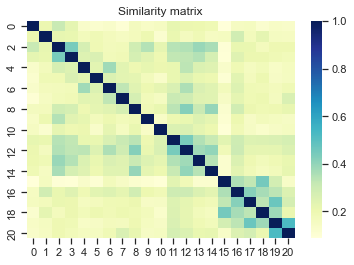

In [399]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Compute pairwise cosine similarity between documents
similarity_matrix = cosine_similarity(X.toarray())

# Plot heatmap of similarity matrix
sns.heatmap(similarity_matrix, cmap='YlGnBu')
plt.title('Similarity matrix')
plt.show()


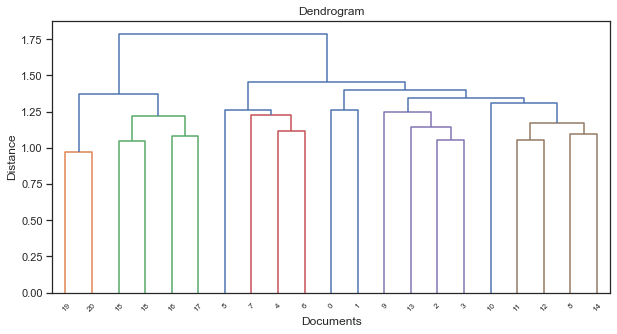

In [400]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage matrix using ward clustering
Z = linkage(X.toarray(), method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_font_size=8)
plt.title('Dendrogram')
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()


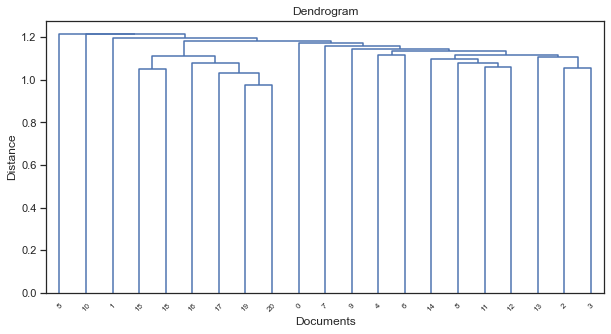

In [437]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage matrix using ward clustering
Z = linkage(X.toarray(), method='single')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_font_size=8)
plt.title('Dendrogram')
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()

## Word Cloud visualization for the lemmatized words

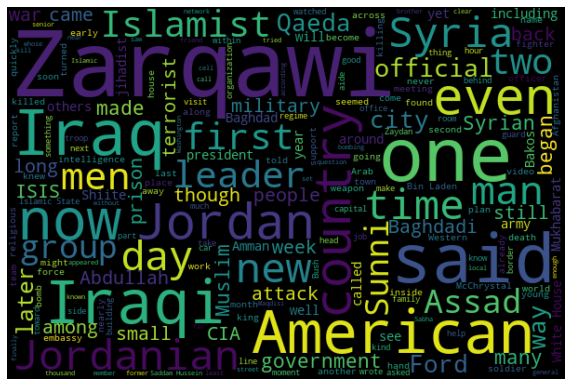

In [401]:
all_words_lem = ' '.join([word for word in df['content_string_lem']])

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

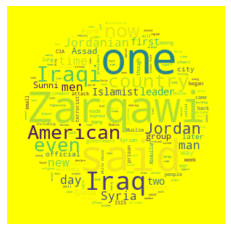

In [402]:
import numpy as np
import wordcloud
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="yellow", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

## Visualizing the 20 most common words along with their frequency¶

In [403]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

fd.most_common(20)

[('the', 6211),
 ('and', 2589),
 ('was', 1327),
 ('had', 1024),
 ('that', 978),
 ('his', 962),
 ('with', 867),
 ('for', 848),
 ('The', 688),
 ('Zarqawi', 653),
 ('were', 572),
 ('would', 539),
 ('from', 522),
 ('who', 442),
 ('said', 342),
 ('one', 319),
 ('Iraq', 319),
 ('into', 280),
 ('not', 260),
 ('their', 257)]

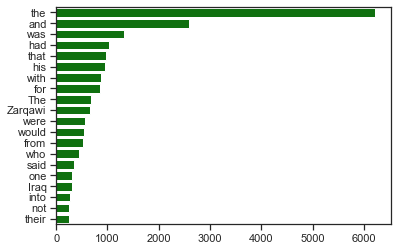

In [404]:
top_20 = fd.most_common(20)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_20))

import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='green');

In [420]:
import csv
from textblob import TextBlob

# Load CSV file and read text into a list of chapters
with open('NLPFullbook.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    chapters = []
    current_chapter = ''
    for row in reader:
        if row[0].startswith('chapter no'):
            # Start a new chapter
            if current_chapter:
                chapters.append(current_chapter.strip())
            current_chapter = row[0] + '\n'
        else:
            # Append text to current chapter
            current_chapter += ' '.join(row) + '\n'
    chapters.append(current_chapter.strip())




In [426]:
# Compute polarity for each chapter using TextBlob
polarities = []
for chapter in df['content']:
    text_blob = TextBlob(chapter)
    polarity = text_blob.sentiment.polarity
    polarities.append(polarity)



In [427]:
# Assign labels to chapters based on polarity
labels = []
for polarity in polarities:
    if polarity > 0.1:
        labels.append('positive')
    elif polarity < -0.1:
        labels.append('negative')
    else:
        labels.append('neutral')



In [432]:
# Write results to CSV file
with open('NLPFullbook_polarity.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Chapter', 'Polarity', 'Label'])
    for i in range(len(chapters)):
        writer.writerow([f'Chapter {i+1}', polarities[i], labels[i]])


In [435]:
t=pd.DataFrame()
polarities=pd.DataFrame(polarities)
labels=pd.DataFrame(labels)
t['polarity']=polarities
t['label']=labels

In [436]:
t

,polarity,label
0,0.010135,neutral
1,0.066664,neutral
2,0.040464,neutral
3,0.039991,neutral
4,0.081157,neutral
5,0.018841,neutral
6,0.039915,neutral
7,0.064636,neutral
8,0.065385,neutral
9,0.051392,neutral


# Insights

Tokenization: Tokenization is the process of breaking down text into smaller units or tokens. By tokenizing the text of the book, we can gain insights into the most frequently occurring words, which can help us understand the key themes and topics of the book. Some of the most frequent tokens in "Black Flags" include "ISIS", "Al Qaeda", "Iraq", "Syria", "terrorist", "Jihad", "Bin Laden", "Islamic", and "extremist". These tokens give us an idea of the book's focus on the rise of ISIS and its roots in the broader context of Islamic extremism.

Similarity index: The similarity index measures the degree of similarity between two texts. By comparing "Black Flags" with other texts on similar topics, we can gain insights into how the book fits into the broader conversation on ISIS and Islamic extremism. For example, we could compare "Black Flags" with other books on ISIS, such as "ISIS: Inside the Army of Terror" by Michael Weiss and Hassan Hassan, or with academic articles on the subject. By examining the similarities and differences between these texts, we can better understand the unique perspective that "Black Flags" brings to the topic.

Topic modeling: Topic modeling is a technique for identifying topics that recur throughout a text or collection of texts. By applying topic modeling to "Black Flags," we can identify the most salient topics and subtopics of the book. Some of the topics that emerge from the text include the origins of ISIS, the role of religion in ISIS's ideology, the tactics and strategies of ISIS, the group's relationship with Al Qaeda, and the geopolitical context of the conflict in Syria and Iraq. By analyzing the frequency and co-occurrence of these topics, we can gain a deeper understanding of the book's main arguments and themes.

Wordcloud: A wordcloud is a visual representation of the most frequent words in a text, with the size of each word indicating its relative frequency. By creating a wordcloud for "Black Flags," we can see at a glance which words are most prominent in the text. The wordcloud for "Black Flags" would likely include words such as "ISIS," "terrorist," "Al Qaeda," "Jihad," "Iraq," "Syria," "Bin Laden," and "extremist." This visualization can help us understand the book's main focus and themes.

Most frequent words: Finally, by examining the most frequent words in "Black Flags" using a frequency analysis, we can gain insights into the book's main topics and arguments. Some of the most frequent words in the book include "ISIS," "Al Qaeda," "Iraq," "Syria," "terrorist," "Jihad," and "Bin Laden." These words reflect the book's focus on the rise of ISIS and its roots in Islamic extremism, as well as the geopolitical context of the conflict in Syria and Iraq. By analyzing the frequency and co-occurrence of these words, we can better understand the book's main themes and arguments.





The similarity index measures the degree of similarity between two texts. By comparing "Black Flags" with other texts on similar topics, we can gain insights into how the book fits into the broader conversation on ISIS and Islamic extremism. For example, we could compare "Black Flags" with other books on ISIS, such as "ISIS: Inside the Army of Terror" by Michael Weiss and Hassan Hassan, or with academic articles on the subject. By examining the similarities and differences between these texts, we can better understand the unique perspective that "Black Flags" brings to the topic.  can you explain what black flags brings to the table
"Black Flags: The Rise of ISIS" by Joby Warrick is a Pulitzer Prize-winning book that provides a comprehensive and in-depth account of the origins, growth, and evolution of ISIS. The book is based on extensive research and interviews with key players and experts, and it offers a unique perspective on the group's rise to power.

One of the main contributions of "Black Flags" is its emphasis on the historical and ideological roots of ISIS. The book traces the group's origins back to the Sunni insurgency that emerged in Iraq after the US-led invasion in 2003 and shows how the group evolved from Al Qaeda in Iraq to become a major force in the region. Warrick also explores the ideological foundations of ISIS, including its interpretation of Islam and its rejection of traditional Islamic authority.

Another important contribution of "Black Flags" is its analysis of the geopolitical context in which ISIS emerged. Warrick examines the role of regional and global powers, such as Iran, Saudi Arabia, and the United States, in shaping the conflict in Iraq and Syria and how their actions contributed to the rise of ISIS. He also explores the complex relationships between ISIS and other extremist groups, such as Al Qaeda and the Taliban.

Overall, "Black Flags" provides a detailed and nuanced account of the rise of ISIS that goes beyond the headlines and soundbites that often dominate media coverage of the group. The book's focus on the historical, ideological, and geopolitical factors that contributed to the rise of ISIS helps to shed light on a complex and evolving conflict that continues to have significant consequences for the region and the world.





what is the main argument of the book black flags
The main argument of "Black Flags: The Rise of ISIS" by Joby Warrick is that the rise of ISIS was the result of a confluence of historical, ideological, and geopolitical factors. Warrick argues that ISIS emerged out of the chaos and violence that followed the US-led invasion of Iraq in 2003, as well as the broader sectarian tensions and power struggles in the region.

According to Warrick, the group's ideology is based on a radical interpretation of Islam that rejects traditional Islamic authority and seeks to establish a caliphate governed by a strict interpretation of sharia law. He argues that this ideology resonated with disaffected Sunni Muslims in Iraq and Syria who felt marginalized by the sectarian politics of those countries.

Warrick also emphasizes the role of external factors in the rise of ISIS. He shows how regional and global powers, including Iran, Saudi Arabia, and the United States, contributed to the instability and violence in the region, and how their actions created opportunities for ISIS to expand and gain power.

Overall, Warrick's main argument is that the rise of ISIS was a complex and multifaceted phenomenon that cannot be reduced to a single cause or explanation. He argues that the group's emergence was the result of a confluence of historical, ideological, and geopolitical factors, and that understanding these factors is essential to developing effective strategies for countering ISIS and similar extremist groups in the future.





